دي تيست كيس عدت علي قبل كده

:::


.محتاجة مساعده من داتا أناليست من فضلكم

عملت سكراب لداتا 10 آلاف مستورد برتقال

وعطلانه بقالي ١٤ ساعه بالضبط في تظبيط شكلها عشان اعرف استخدمها!


10753 row: each has a unique company name

36 columns: each contains a different record(s) (for 1 company) as shown in the screenshot

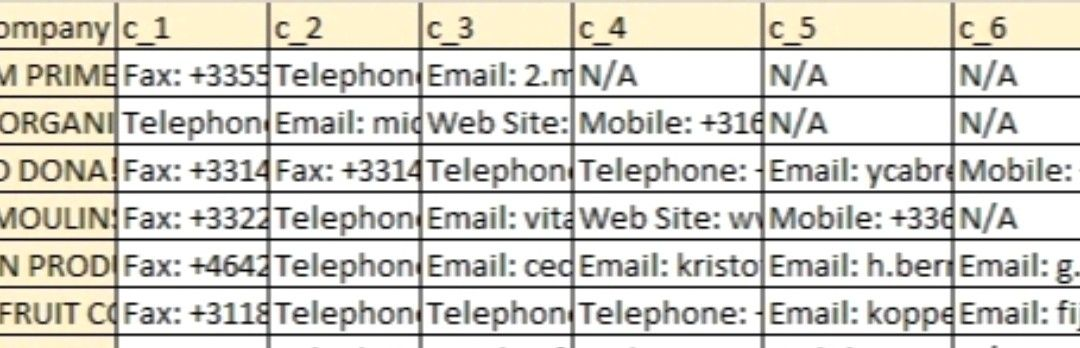
عايزة اخلى الداتا اللى شبه بعض تحت بعض

مع العلم ان في شركات لها اكتر من ايميل مثلاً.. ف عاوزة أعمل مثلاً

Email_1 , Email_2 ,... etc

على حسب المطلوب


:::



---



هتلاقي تحت داتا فريم نفس فكرة المشكلة اللي فوق، مطلوب من حضرتك تعمل سكربت يطلع
الداتا بالشكل المطلوب

Desired output:

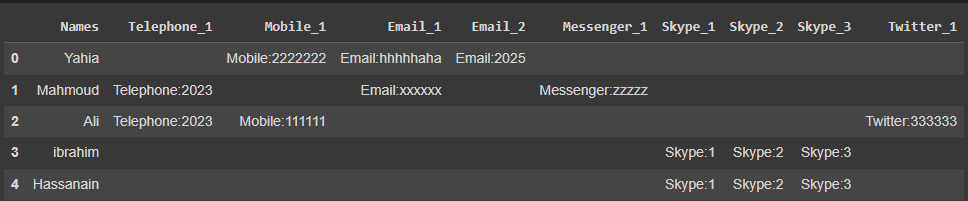

In [7]:
import pandas as pd

In [8]:
# Creating Dummy data frame to try our code on

Names = ["Yahia", "Mahmoud", "Ali", "ibrahim", "Hassanain"]
c1 = ["Email:hhhhhaha","Telephone:2023", "Mobile:111111", "Skype:1", "Skype:1"]
c2 = ["Mobile:2222222", "Email:xxxxxx","Telephone:2023", "Skype:2", "Skype:2" ]
c3 = ["Email:2025", "Messenger:zzzzz", "Twitter:333333", "Skype:3", "Skype:3"]


d = {'Names': Names, 'c_1': c1, 'c_2':c2, 'c_3':c3}
df = pd.DataFrame(data=d)

In [9]:
def split_contacts(data, index):

  data = data.set_index('Names')
  
  row_contacts = []
  
  for i in data.iloc[index].values:
    row_contacts.append(i.split(':'))
  
  return row_contacts

In [10]:
def convert_to_dict(data):
  result = {}
  counter = {}

  for key, value in data:
    count = counter.get(key, 0) + 1
    counter[key] = count
    result[f"{key}_{count}"] = value

  return result

In [11]:
def organize_df(df):
  
  df_in_dict = {}
  
  for i in range(len(df)):
    df_in_dict[f"{df['Names'].iloc[i]}"] = convert_to_dict(split_contacts(df,i))
  
  df_organized = pd.DataFrame(df_in_dict)\
    .sort_index().T.reset_index().rename(columns={'index': 'Names'})
  
  return df_organized


In [12]:
organize_df(df)

,Names,Email_1,Email_2,Messenger_1,Mobile_1,Skype_1,Skype_2,Skype_3,Telephone_1,Twitter_1
0,Yahia,hhhhhaha,2025,NaN,2222222,NaN,NaN,NaN,NaN,NaN
1,Mahmoud,xxxxxx,NaN,zzzzz,NaN,NaN,NaN,NaN,2023,NaN
2,Ali,NaN,NaN,NaN,111111,NaN,NaN,NaN,2023,333333
3,ibrahim,NaN,NaN,NaN,NaN,1,2,3,NaN,NaN
4,Hassanain,NaN,NaN,NaN,NaN,1,2,3,NaN,NaN
